# Instagram Reach Analysis and Forecasting




## 1. Import Libraries and Load Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = 'path_to_your_file/Instagram-Reach (1).csv'
data = pd.read_csv("/content/Instagram-Reach (1).csv")

data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


## 2. Check for Null Values, Column Info, and Descriptive Statistics

In [23]:
null_values = data.isnull().sum()
print(null_values)

column_info = data.info()

descriptive_stats = data.describe()
print(descriptive_stats)

Instagram reach    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-04-01 to 2023-03-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Instagram reach  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


## 3. Convert Date Column to Datetime

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


## 4. Analyze the Trend of Instagram Reach Over Time

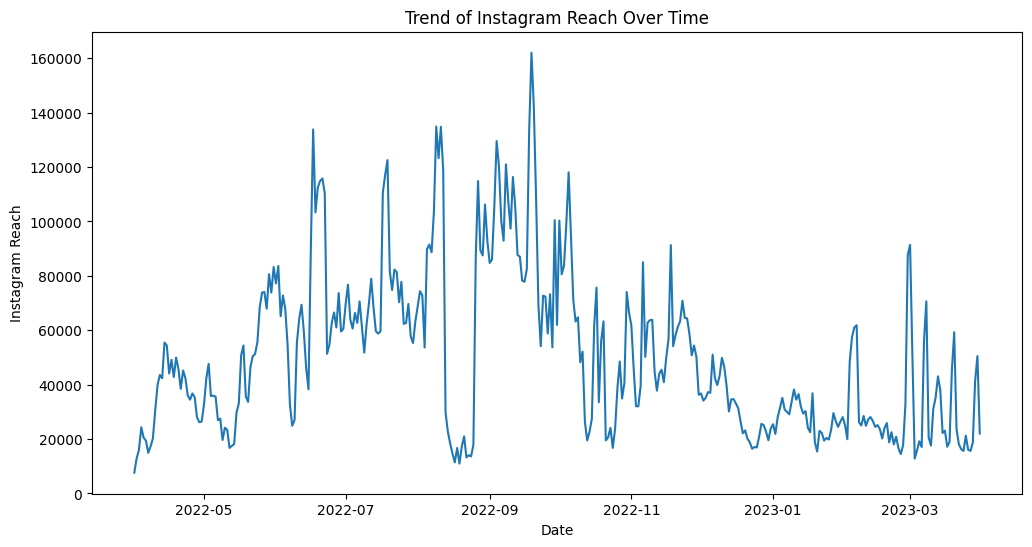

In [9]:
# Analyze the trend of Instagram reach over time using a line chart
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'])
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Trend of Instagram Reach Over Time')
plt.show()

## 5. Analyze Instagram Reach for Each Day

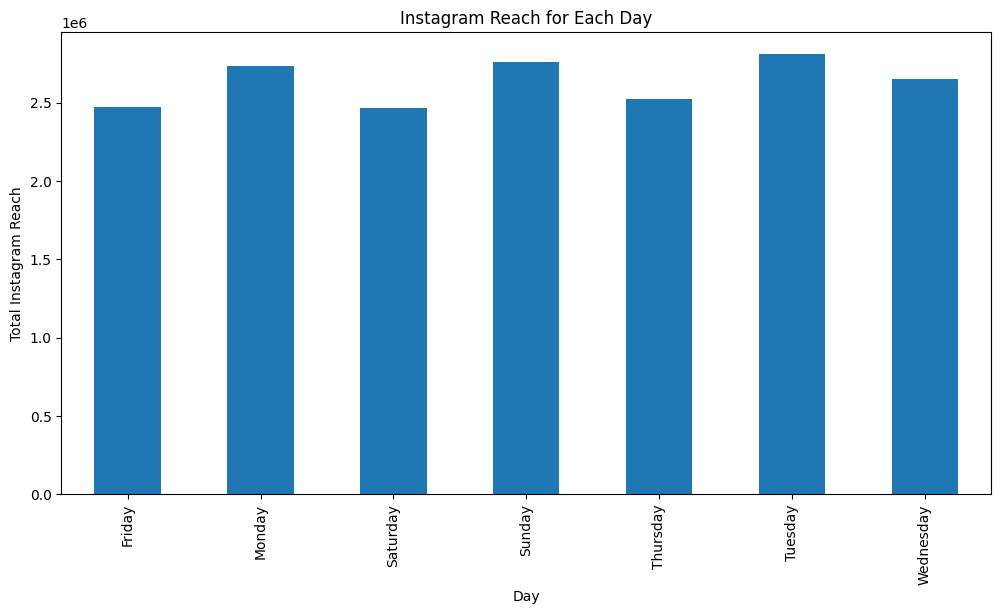

In [10]:
data['Day'] = data['Date'].dt.day_name()

# Analyze Instagram reach for each day using a bar chart
plt.figure(figsize=(12, 6))
data.groupby('Day')['Instagram reach'].sum().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Total Instagram Reach')
plt.title('Instagram Reach for Each Day')
plt.show()

## 6. Analyze the Distribution of Instagram Reach

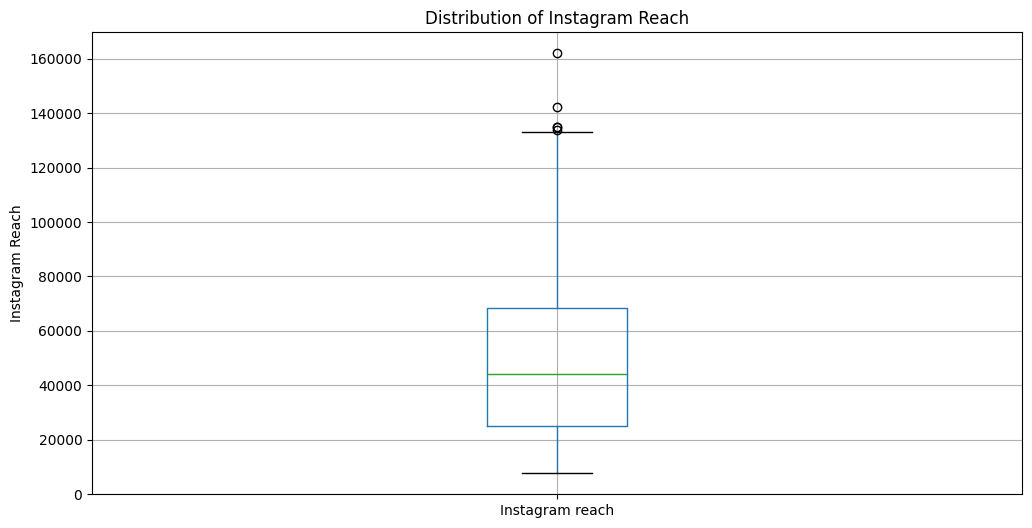

In [11]:
# Analyze the distribution of Instagram reach using a box plot
plt.figure(figsize=(12, 6))
data.boxplot(column='Instagram reach')
plt.ylabel('Instagram Reach')
plt.title('Distribution of Instagram Reach')
plt.show()

## 7. Calculate Mean, Median, and Standard Deviation of Instagram Reach for Each Day

In [12]:
grouped_data = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(grouped_data)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


## 8. Visualize Reach for Each Day of the Week

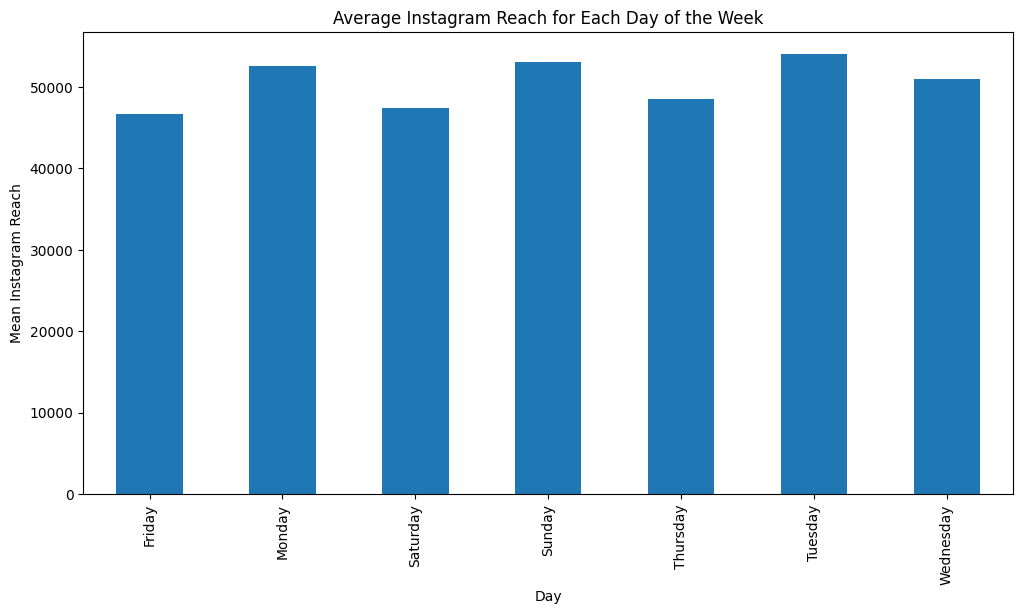

In [13]:
# Create a bar chart to visualize the reach for each day of the week
plt.figure(figsize=(12, 6))
data.groupby('Day')['Instagram reach'].mean().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Mean Instagram Reach')
plt.title('Average Instagram Reach for Each Day of the Week')
plt.show()

## 9. Check Trends and Seasonal Patterns

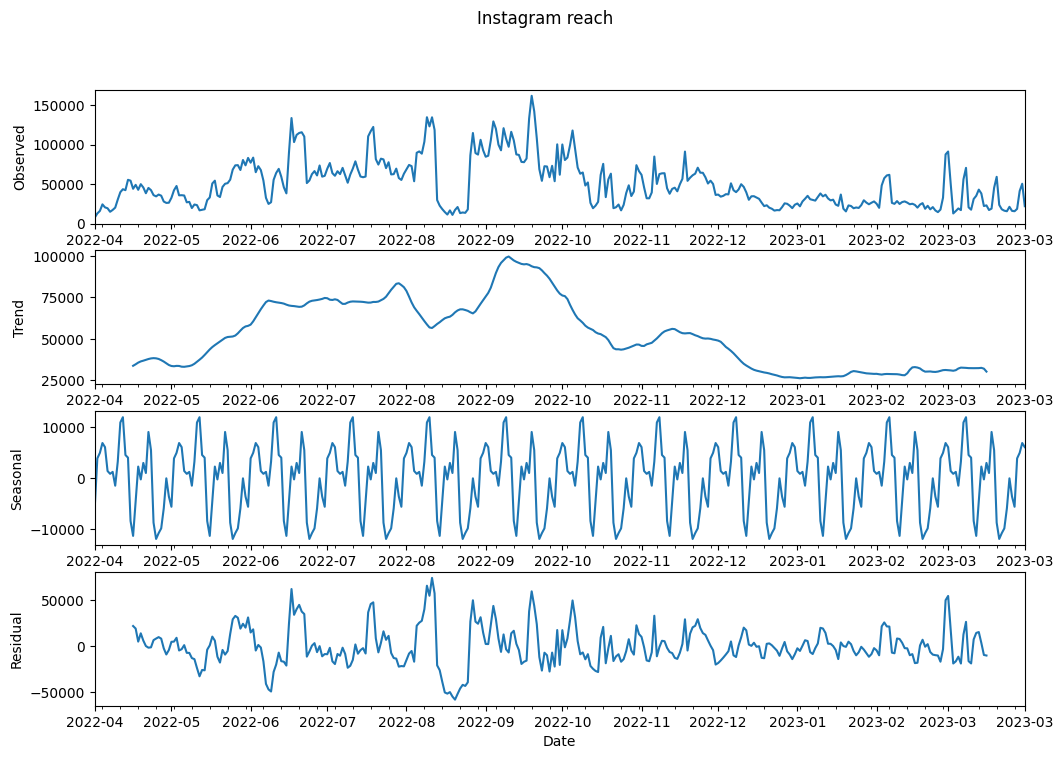

In [19]:
# Decompose the time series data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import DateFormatter

file_path = 'path_to_your_file/Instagram-Reach (1).csv'
data = pd.read_csv("/content/Instagram-Reach (1).csv")

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

result = seasonal_decompose(data['Instagram reach'], model='additive', period=30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

date_form = DateFormatter("%Y-%m")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)
ax4.xaxis.set_major_formatter(date_form)

plt.suptitle('Instagram reach')
plt.show()


## 10. Forecast Instagram Reach Using SARIMA Model

<Figure size 1200x600 with 0 Axes>

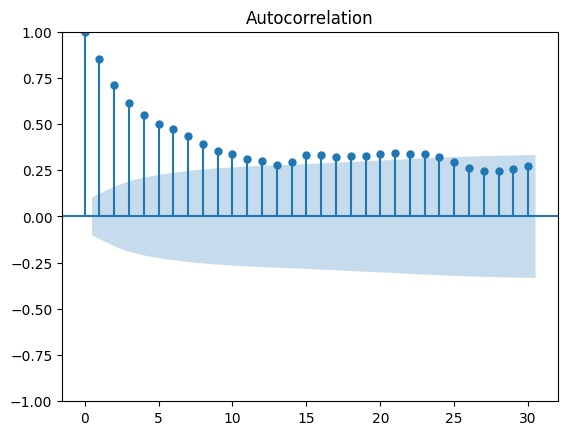

<Figure size 1200x600 with 0 Axes>

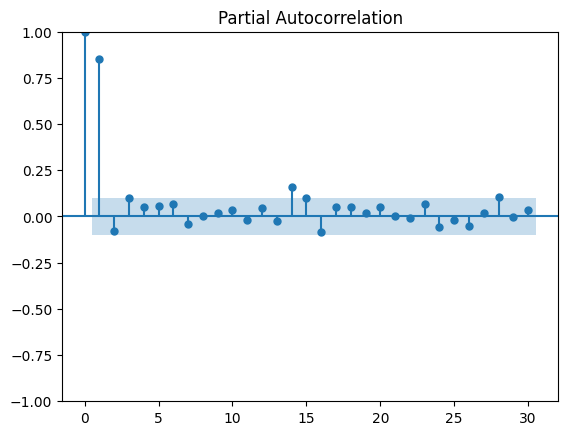

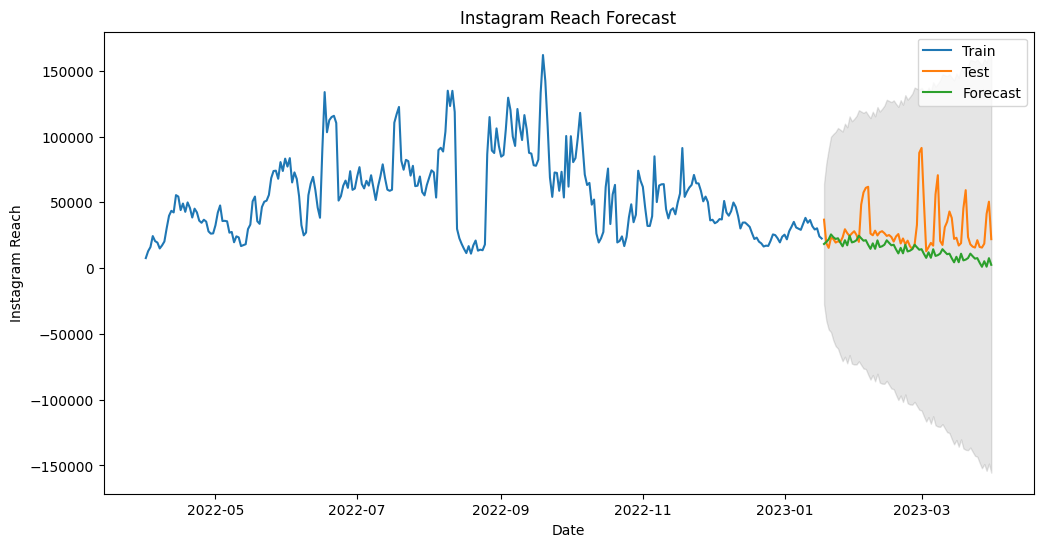

Mean Absolute Error: 15920.618783421476
Mean Squared Error: 548062907.5923051


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'path_to_your_file/Instagram-Reach (1).csv'
data = pd.read_csv("/content/Instagram-Reach (1).csv")

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data.asfreq('D')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data['Instagram reach'], lags=30)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Instagram reach'], lags=30)
plt.show()

# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Fit the SARIMA model
model = SARIMAX(train['Instagram reach'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast = results.get_forecast(steps=len(test))
forecast_df = forecast.summary_frame()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Instagram reach'], label='Train')
plt.plot(test.index, test['Instagram reach'], label='Test')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecast')
plt.legend()
plt.show()

# Calculate error metrics
mae = mean_absolute_error(test['Instagram reach'], forecast_df['mean'])
mse = mean_squared_error(test['Instagram reach'], forecast_df['mean'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
